# Practice :

## Task 1:

### Import Libraries :

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

#ignore warningsabs
import warnings
warnings.filterwarnings('ignore')

### Reading Dataset

In [75]:
data_df=pd.read_csv('DS3_C1_S2_Weather_Data_Practice.csv')
data_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [76]:
data_df.dtypes

Date     object
Temp    float64
dtype: object

### Converting into Datetime

In [77]:
data_df['Date']=pd.to_datetime(data_df["Date"])
data_df.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

### Reset Index

In [78]:
data_df=data_df.set_index('Date')
data_df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


### Plot the Actual Data :

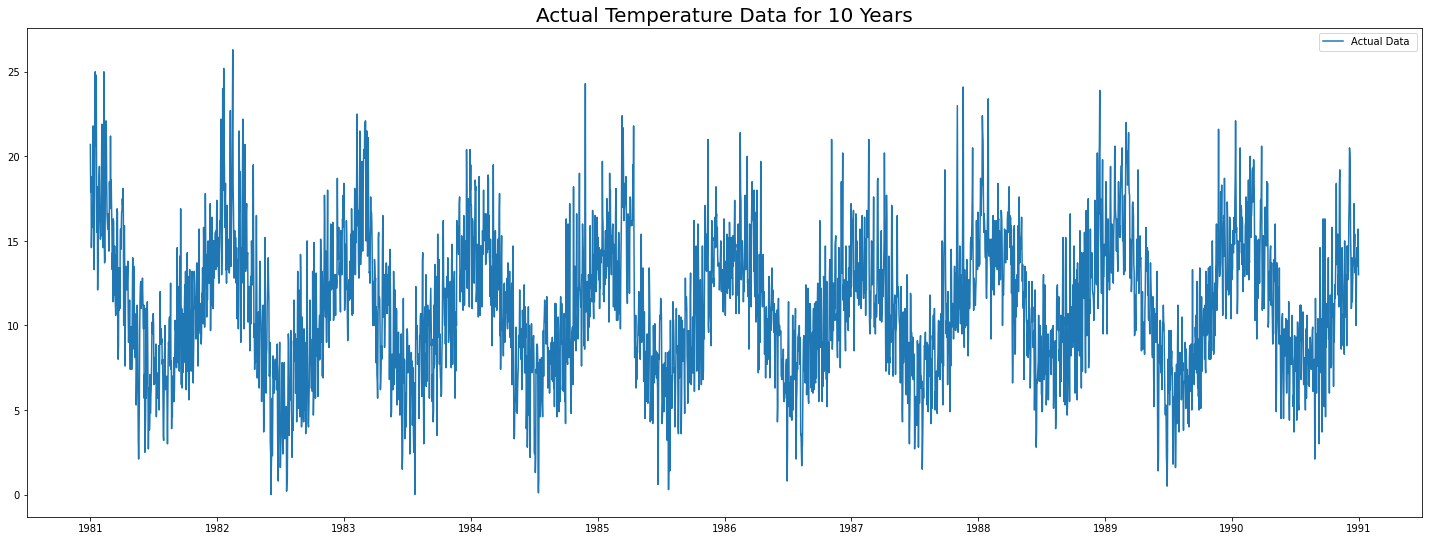

In [79]:
plt.figure(figsize=(25,9))
plt.plot(data_df,label="Actual Data ")
plt.legend()
plt.title('Actual Temperature Data for 10 Years',fontdict={
    'font':'DejaVu Sans',
    'fontsize':20

})
plt.show()

### Rolling Average 

In [80]:
lags = 30
moving_avg = data_df['Temp'].rolling(window=lags).mean()

In [81]:
data=pd.DataFrame({'Actual':data_df['Temp'],'Moving Average':moving_avg})
data.head()

,Actual,Moving Average
Date,,
1981-01-01,20.7,NaN
1981-01-02,17.9,NaN
1981-01-03,18.8,NaN
1981-01-04,14.6,NaN
1981-01-05,15.8,NaN


In [82]:
data.isnull().sum()

Actual             0
Moving Average    29
dtype: int64

In [83]:
data.Actual.head(lags).mean()

17.79

### Plot Actual vs Smoothen data 

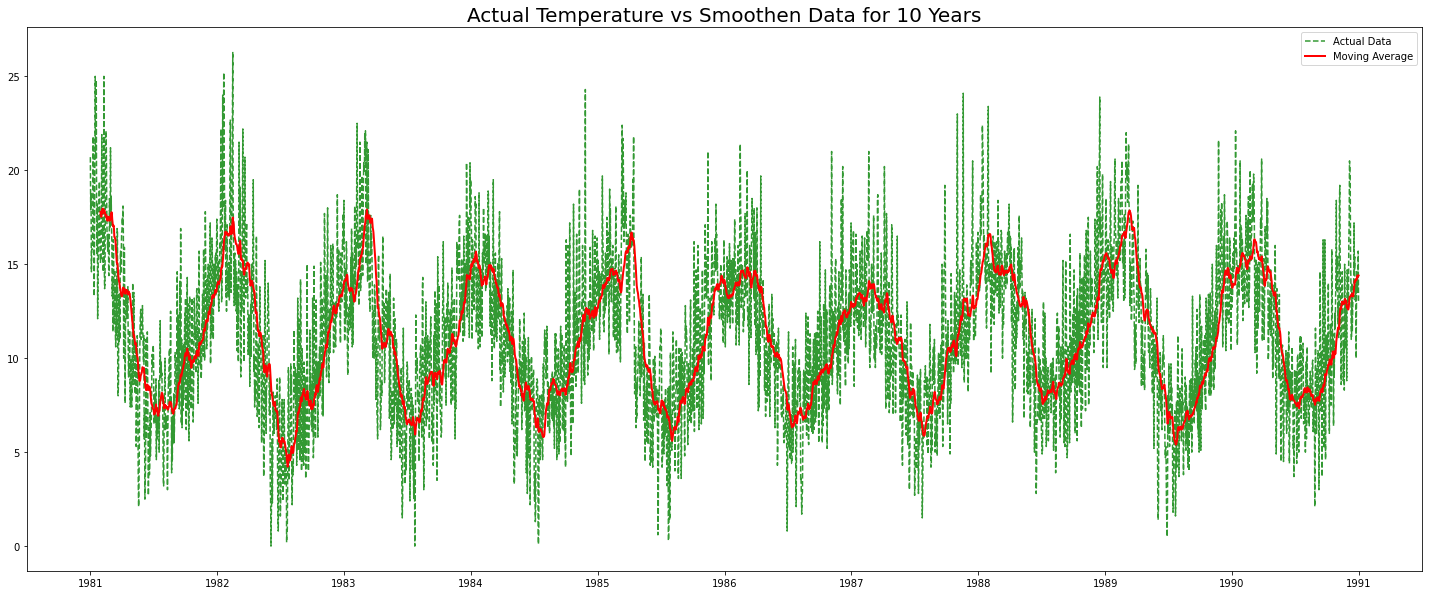

In [84]:
plt.figure(figsize=(25,10))
plt.plot(data_df,label="Actual Data ",color='g',alpha=0.8,linestyle='--')
plt.plot(data['Moving Average'],color='r',label='Moving Average',linewidth=2)
plt.legend()
plt.title('Actual Temperature vs Smoothen Data for 10 Years',fontdict={
    'font':'bold',
    'fontsize':20
})
plt.show()

### Moving average helps us to reduce the sharpness of data and short term fluctuations and make the predictions more accurate .

## Task 2:

### Time series components :

In [85]:
decomposition=seasonal_decompose(data_df, period=730,model='additive')
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

### Plotting the Components :

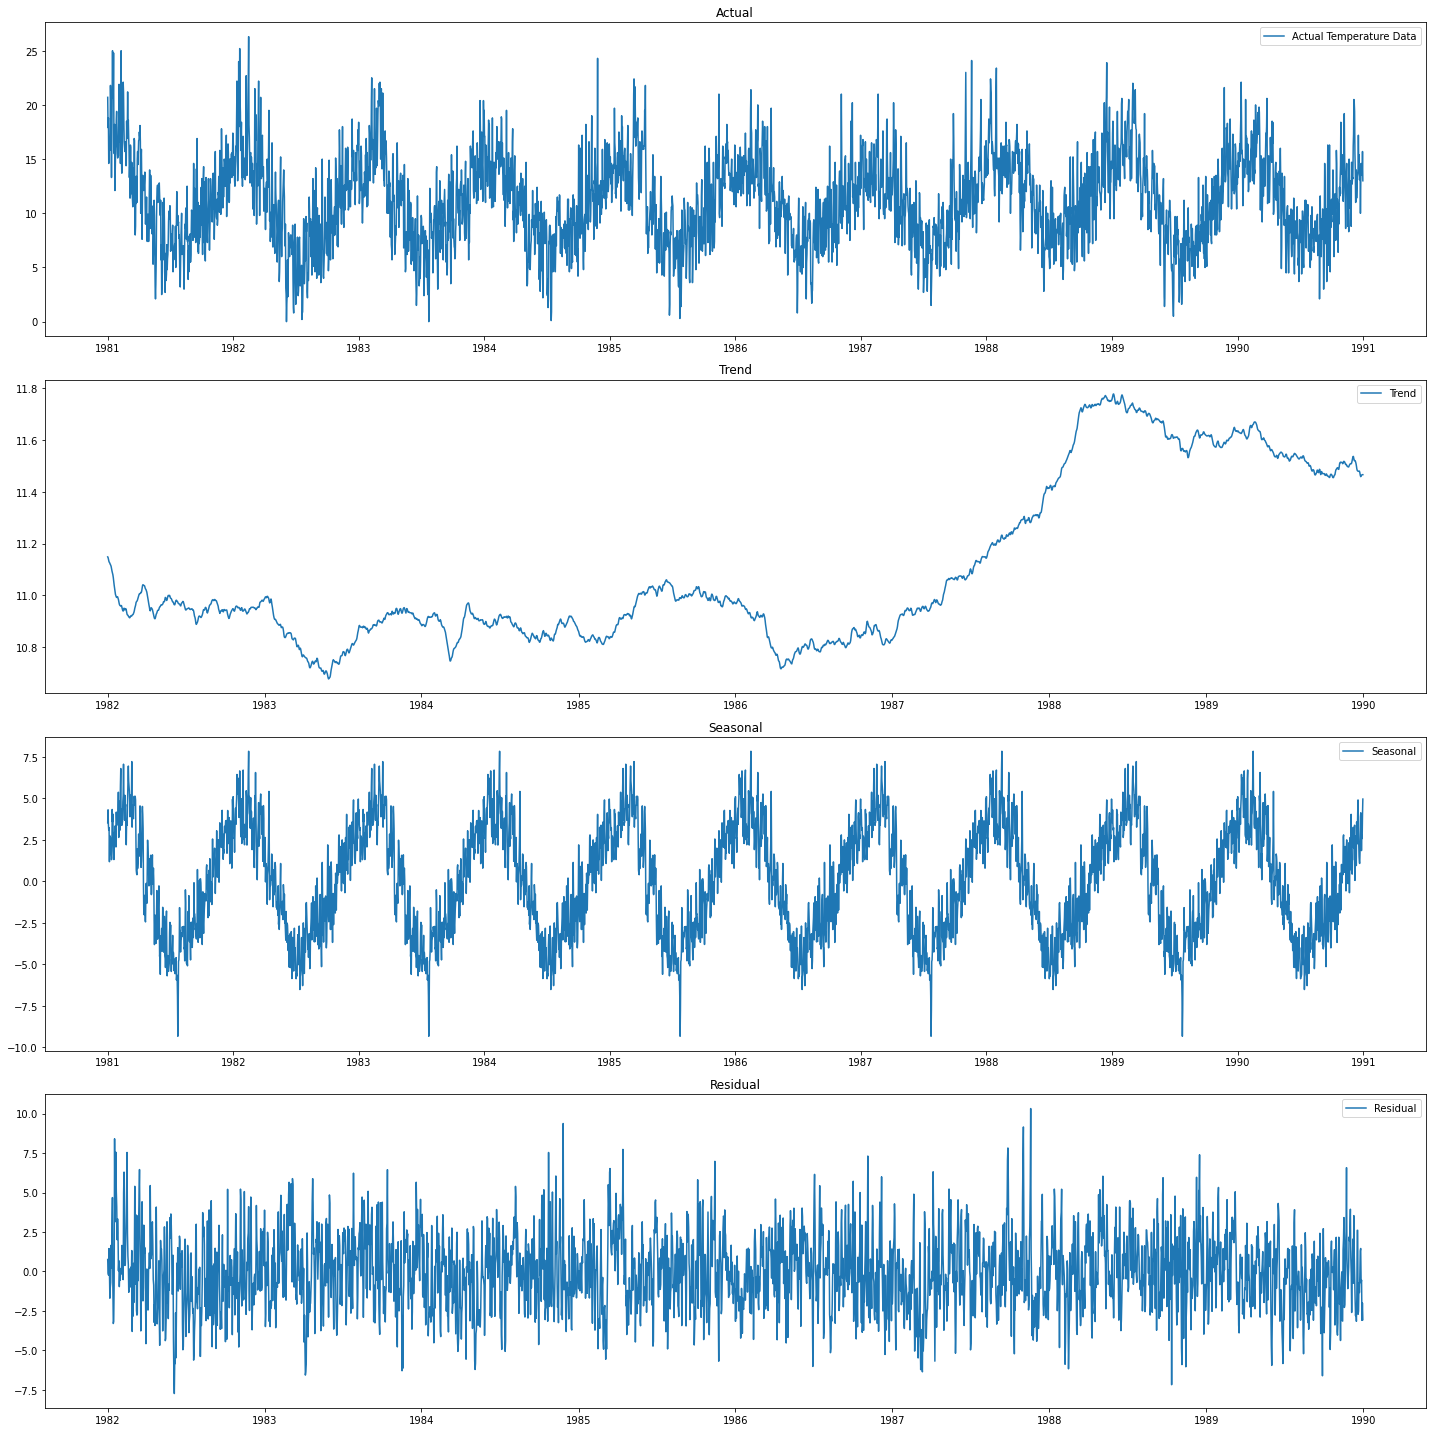

In [86]:
fig,ax = plt.subplots(4,1,figsize=(20,20))

plt.subplot(411)
plt.plot(data_df,label='Actual Temperature Data')
plt.legend(loc='best')
plt.title('Actual')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')
plt.title('Trend')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')
plt.title('Seasonal')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')
plt.title('Residual')

plt.tight_layout()
plt.show()

Data Does have the seasonality as its the temperature data and temperatures varies according to season.

## Task 3:

In [87]:
from statsmodels.tsa.stattools import adfuller

In [88]:
def checkStationarity(data):
    pvalue = adfuller(data_df)[1]
    print(pvalue)

    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return msg

In [89]:
print(checkStationarity(data_df))

0.00024708263003611787
pvalue=0.00024708263003611787. Data is Stationary. Proceed to model building


Data is Stationary and hence we need not to use lag difference.

## Task 4:

### Simple Exponent Smoothing (no trend/seasonality)

In [90]:
def simplesmoothing(data,alpha):
    model = SimpleExpSmoothing(data).fit(smoothing_level=alpha,optimized=False)
    pdct = model.fittedvalues
    df = pd.DataFrame({'actual':data, 'forecast':pdct})
    return(model,df)

In [91]:
data=data_df['Temp']
data_df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [92]:
d_simple_exp = {}
alphas = [0, 0.2, 0.6, 0.8]

for a in alphas:
    model, df = simplesmoothing(data,a)
    d_simple_exp[a] = df.forecast

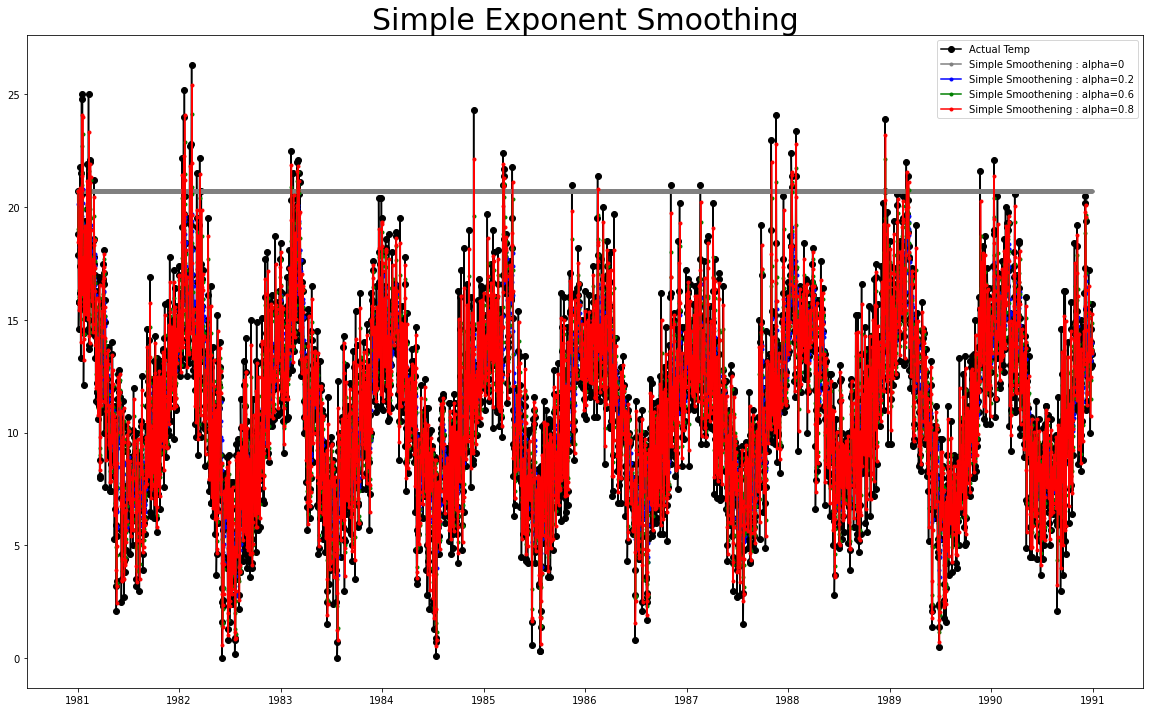

In [93]:
colors = ['grey','blue','green','red']


# plot the actual and forecast data
fig,ax = plt.subplots(1,1,figsize=(20,12))
plt.plot(data, marker='o', color='black',label='Actual Temp')

for i in range(len(alphas)):
    plt.plot(d_simple_exp[alphas[i]],marker='.',color=colors[i],label='Simple Smoothening : alpha=' + str(alphas[i]))

plt.title('Simple Exponent Smoothing',fontsize=30)
plt.legend()
plt.show()

### Double Exponent Smoothing (trend, but no seasonality)

In [94]:
modeld = ExponentialSmoothing(data_df,trend='additive').fit(smoothing_level=0.2, smoothing_slope=0.5)

fitted=modeld.fittedvalues
fitted

Date
1981-01-01    16.180352
1981-01-02    17.000558
1981-01-03    17.186667
1981-01-04    17.676888
1981-01-05    16.921376
                ...    
1990-12-27    13.729330
1990-12-28    13.645129
1990-12-29    13.493255
1990-12-30    13.352431
1990-12-31    13.914528
Length: 3650, dtype: float64

Text(0.5, 1.0, 'Double Exponent Smoothing')

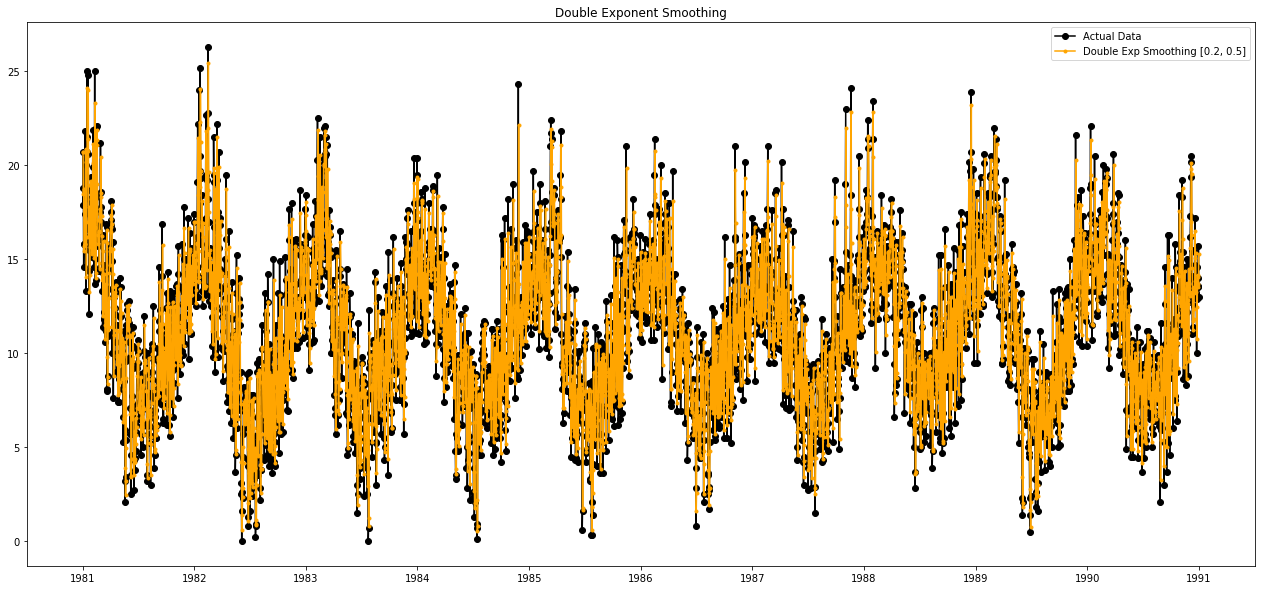

In [95]:
plt.figure(figsize=(22,10))
plt.plot(data_df,marker='o',color='black',label='Actual Data')
plt.plot(model.fittedvalues, marker='.',color='orange',label='Double Exp Smoothing [0.2, 0.5]',alpha=1)
plt.legend()
plt.title('Double Exponent Smoothing')

### Triple Exponential Smoothing

In [96]:
# build model
model = ExponentialSmoothing(data,trend='additive',seasonal='add',seasonal_periods=365).fit()

Text(0.5, 1.0, 'Triple Exponent Smoothing')

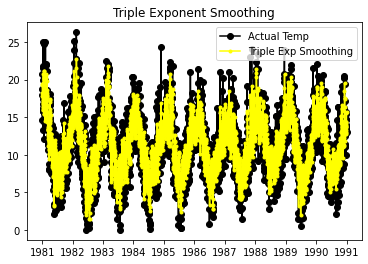

In [97]:
# plot the actual and triple smoothing values
plt.plot(data_df, marker='o',color='black',label='Actual Temp')
plt.plot(model.fittedvalues,marker='.',color='yellow',label='Triple Exp Smoothing')
plt.legend()
plt.title('Triple Exponent Smoothing')

## Forecasting Data using Triple Exponential Smoothing

In [98]:
# forecast
f_dexp = model.fittedvalues
print(f_dexp)

Date
1981-01-01    19.403429
1981-01-02    19.334213
1981-01-03    18.198568
1981-01-04    17.781954
1981-01-05    16.377434
                ...    
1990-12-27    12.996295
1990-12-28    12.792419
1990-12-29    13.733599
1990-12-30    15.555566
1990-12-31    15.682652
Length: 3650, dtype: float64
